In [8]:
import numpy as np
import pandas as pd

In [9]:
import warnings
warnings.filterwarnings("ignore")

In [10]:
from statsmodels.tsa.ar_model import AR, ARResults

In [11]:
us_pop = pd.read_csv("Data/uspopulation.csv", index_col="DATE", parse_dates=True)

In [12]:
us_pop.index.freq = "MS"

In [13]:
us_pop.tail()

,PopEst
DATE,
2018-08-01,327698
2018-09-01,327893
2018-10-01,328077
2018-11-01,328241
2018-12-01,328393


<AxesSubplot:xlabel='DATE'>

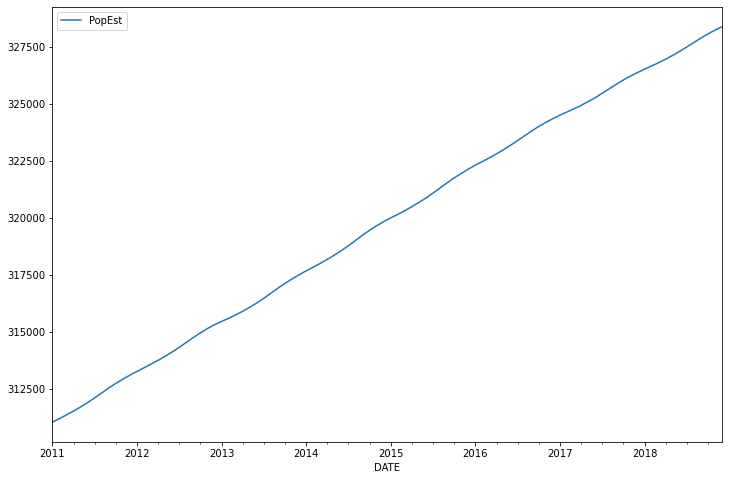

In [14]:
# Ploting the Popoulation

us_pop.plot(figsize=(12,8))

In [15]:
# Length of the DataFrame
len(us_pop)

96

In [16]:
# Dividnig the Data in Train and Test set

train_pop = us_pop.iloc[:84]
test_pop = us_pop.iloc[84:]    # Taking 1 year as a Test Data

In [17]:
test_pop

,PopEst
DATE,
2018-01-01,326527
2018-02-01,326669
2018-03-01,326812
2018-04-01,326968
2018-05-01,327134
2018-06-01,327312
2018-07-01,327502
2018-08-01,327698
2018-09-01,327893


In [18]:
# Training the the AR model

model = AR(train_pop['PopEst'])

In [19]:
# TFItitng the AR1 Model

AR1fit = model.fit(maxlag=1)   # maxlag will take the input as no of lag u need to perform on the data

In [20]:
# Paramenters of the AR1 model

AR1fit.params

const        284.913797
L1.PopEst      0.999686
dtype: float64

In [24]:
start = len(train_pop)

end = len(train_pop) + len(test_pop) - 1

In [25]:
start

84

In [26]:
# Predicting on the Test Data

prediction1 = AR1fit.predict(start=start, end=end).rename("AR1-Predictions")

prediction1


2018-01-01    326560.403377
2018-02-01    326742.749463
2018-03-01    326925.038278
2018-04-01    327107.269838
2018-05-01    327289.444162
2018-06-01    327471.561268
2018-07-01    327653.621173
2018-08-01    327835.623896
2018-09-01    328017.569455
2018-10-01    328199.457868
2018-11-01    328381.289152
2018-12-01    328563.063326
Freq: MS, Name: AR1-Predictions, dtype: float64

<AxesSubplot:xlabel='DATE'>

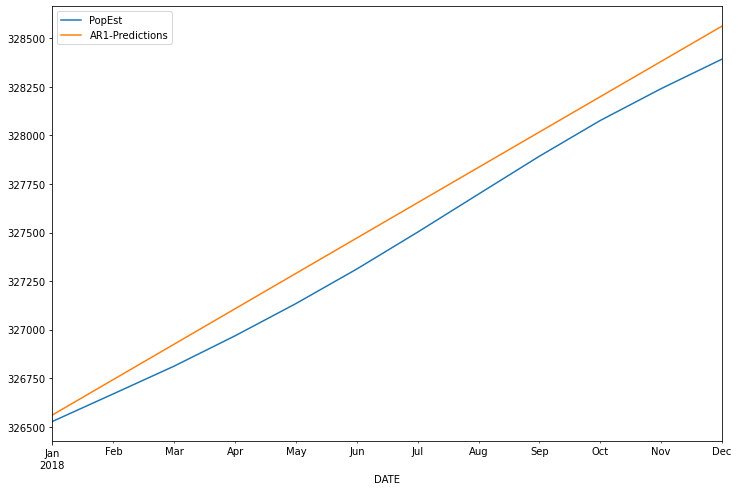

In [98]:
test_pop.plot(figsize=(12,8), legend = True)
prediction1.plot(legend=True)

In [103]:
# Training the DAta with AR(2 model)

model1 = AR(train_pop['PopEst'])
AR2fit = model1.fit(maxlag=2)

In [104]:
AR2fit.params

const        137.368305
L1.PopEst      1.853490
L2.PopEst     -0.853836
dtype: float64

In [105]:
prediction2 = AR2fit.predict(start,end).rename("AR2-Prediction")

<AxesSubplot:xlabel='DATE'>

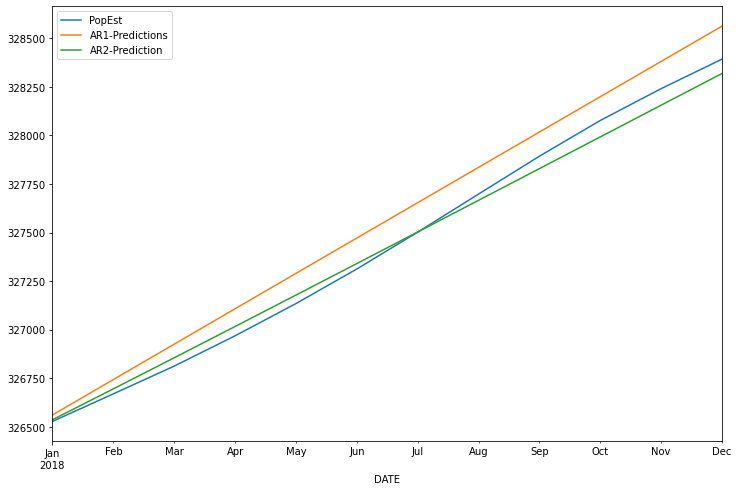

In [106]:
test_pop.plot(figsize=(12,8), legend = True)
prediction1.plot(legend=True)
prediction2.plot(legend=True)

<font color = green> <b> AR(2) is predioction much better than AR(1) model

In [107]:
# Finding the best value of P for the AR model

model2 = AR(train_pop['PopEst'])
AR_fit = model2.fit(ic='t-stat')

In [111]:
AR_fit.params

const        82.309677
L1.PopEst     2.437997
L2.PopEst    -2.302100
L3.PopEst     1.565427
L4.PopEst    -1.431211
L5.PopEst     1.125022
L6.PopEst    -0.919494
L7.PopEst     0.963694
L8.PopEst    -0.439511
dtype: float64

In [112]:
prediction8 = AR_fit.predict(start,end).rename("AR8-Predictions")

In [114]:
# Evaluating the AR model

from sklearn.metrics import mean_squared_error

In [115]:
labels = ['AR1', 'AR2', 'AR8']
preds = [prediction1, prediction2, prediction8]

In [117]:
for i in range(3):
    error = mean_squared_error(test_pop['PopEst'], preds[i])
    print(f"{labels[i]} MSE was: {error}")

AR1 MSE was: 17449.714239577344
AR2 MSE was: 2713.258615675103
AR8 MSE was: 186.97058618962419


<AxesSubplot:xlabel='DATE'>

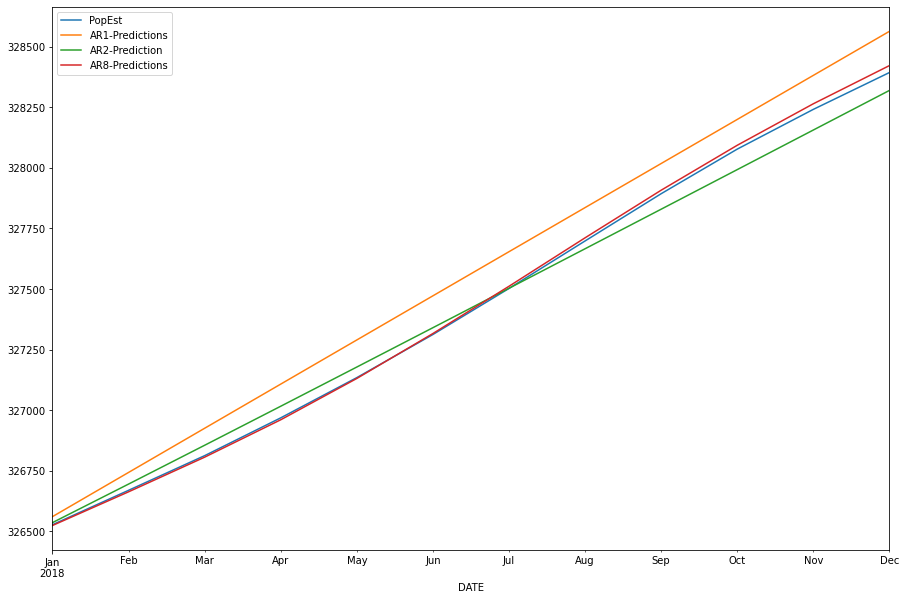

In [118]:
# Ploting All AR model with the Test data
test_pop.plot(figsize=(15,10), legend = True)
prediction1.plot(legend=True)
prediction2.plot(legend=True)
prediction8.plot(legend=True)

### Forcasting the Future

In [141]:
# Training the WHole Data Set

model3 = AR(us_pop['PopEst'])

AR_fut = model3.fit(ic='t-stat')

forcasted_values = AR_fut.predict(start= len(us_pop)-1, end= len(us_pop)+12).rename("Forcasted_Values")

In [142]:
AR_fut.params

const         84.885175
L1.PopEst      2.296674
L2.PopEst     -2.109518
L3.PopEst      1.429221
L4.PopEst     -1.259837
L5.PopEst      1.093852
L6.PopEst     -0.985774
L7.PopEst      1.066295
L8.PopEst     -0.858709
L9.PopEst      0.826672
L10.PopEst    -1.074975
L11.PopEst     1.034535
L12.PopEst    -0.458679
dtype: float64

<AxesSubplot:xlabel='DATE'>

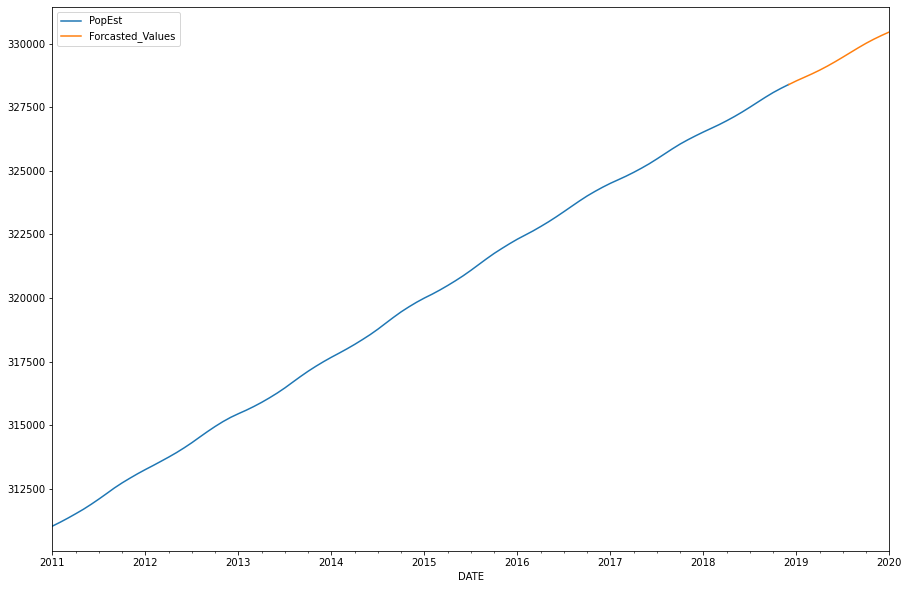

In [143]:
# Ploting the Forecasted values

us_pop.plot(figsize=(15,10), legend = True)
forcasted_values.plot(legend=True)

In [72]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

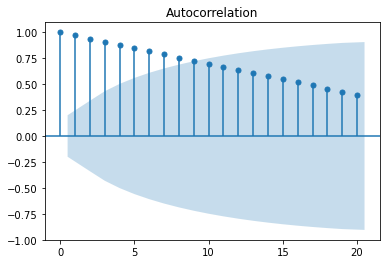

In [75]:
plot_acf(us_pop);

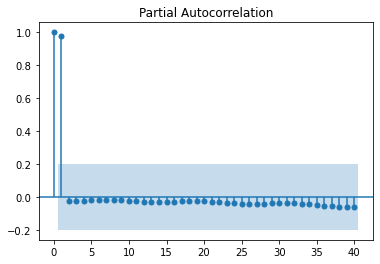

In [52]:
plot_pacf(us_pop, lags=40);